In [4]:
import pandas as pd
import numpy as np

def load_data(filename):
    df = pd.read_csv(filename)
    print("First 5 rows of the data:")
    print(df.head())
    return df



if __name__ == "__main__":
    
    df = load_data("metabolic_dataset.csv")
    
    

First 5 rows of the data:
    Metabolite Condition  Replicate  Concentration Units
0  Metabolite1   Control          1      80.281301    μM
1  Metabolite1   Control          2      84.658008    μM
2  Metabolite1   Control          3      75.872092    μM
3  Metabolite1   Control          4      75.872174    μM
4  Metabolite1   Control          5      84.938922    μM


In [ ]:
def handle_missing_values(df):
    print("\nMissing values in the data:")
    print(df.isnull().sum())
    df_copy = df.copy()
    grouped = df_copy.groupby(["Metabolite", "Condition"])
    median_values = grouped["Concentration"].median()
    for i in range(len(df_copy)):
        if pd.isnull(df_copy["Concentration"][i]):
            metabolite = df_copy["Metabolite"][i]
            condition = df_copy["Condition"][i]
            median = median_values.get((metabolite, condition), 0)
            df_copy.loc[i, "Concentration"] = median
    print("\nMissing values filled with group medians:")
    print(df_copy.isnull().sum())
    return df_copy


df = handle_missing_values(df)



Missing values in the data:
Metabolite       0
Condition        0
Replicate        0
Concentration    0
Units            0
dtype: int64

Missing values filled with group medians:
Metabolite       0
Condition        0
Replicate        0
Concentration    0
Units            0
dtype: int64


In [13]:
def standardize_units(df):
    df_copy = df.copy()
    for i in range(len(df_copy)):
        if df_copy["Units"][i] == "mM":
            df_copy.loc[i, "Concentration"] = df_copy["Concentration"][i] * 1000
            df_copy.loc[i, "Units"] = "\u00B5M"
    print("\nUnits changed to µM. Sample of updated data:")
    print(df_copy[["Metabolite", "Concentration", "Units"]].tail(10))
    return df_copy    

df = standardize_units(df)


Units changed to µM. Sample of updated data:
      Metabolite  Concentration Units
90  Metabolite10      63.468889    μM
91  Metabolite10      61.808908    μM
92  Metabolite10      52.587281    µM
93  Metabolite10      62.048568    μM
94  Metabolite10      62.482289    μM
95  Metabolite10      94.497348    μM
96  Metabolite10      81.219333    μM
97  Metabolite10      83.688874    μM
98  Metabolite10      82.007579    μM
99  Metabolite10      76.337747    μM


In [14]:

def handle_outliers(df):
    df_copy = df.copy()
    non_outliers = df_copy[df_copy["Concentration"] <= 100]
    grouped = non_outliers.groupby(["Metabolite", "Condition"])
    median_values = grouped["Concentration"].median()
    print("\nMedian for Metabolite7, Control:", median_values.get(("Metabolite7", "Control"), "Not found"))
    for i in range(len(df_copy)):
        conc = df_copy["Concentration"][i]
        if not pd.isnull(conc) and conc > 100:
            metabolite = df_copy["Metabolite"][i]
            condition = df_copy["Condition"][i]
            median = median_values.get((metabolite, condition), df_copy["Concentration"].median())
            df_copy.loc[i, "Concentration"] = median
    print("\nOutliers (>100 µM) replaced with group medians. Checking Metabolite7:")
    print(df_copy[df_copy["Metabolite"] == "Metabolite7"][["Metabolite", "Condition", "Concentration"]])
    return df_copy


df = handle_outliers(df)


Median for Metabolite7, Control: 45.133129282577144

Outliers (>100 µM) replaced with group medians. Checking Metabolite7:
     Metabolite  Condition  Concentration
60  Metabolite7    Control      36.529010
61  Metabolite7    Control      53.737248
62  Metabolite7    Control      45.133129
63  Metabolite7    Control      45.133129
64  Metabolite7    Control      45.133129
65  Metabolite7  Treatment      29.971337
66  Metabolite7  Treatment      28.529376
67  Metabolite7  Treatment      31.413299
68  Metabolite7  Treatment      37.017206
69  Metabolite7  Treatment      27.036385


In [16]:
grouped = df.groupby(["Metabolite", "Condition"])["Concentration"]
summary_stats = grouped.agg(["mean", "median", "std"]).reset_index()
print("\nSummary Statistics (Mean, Median, Std Dev):")
print(summary_stats)
mean_data = grouped.mean().reset_index()
print("\nMean Concentration by Metabolite and Condition:")
print(mean_data)


Summary Statistics (Mean, Median, Std Dev):
      Metabolite  Condition       mean     median       std
0    Metabolite1    Control  80.324499  80.281301  4.464336
1    Metabolite1  Treatment  75.722223  74.719990  2.254788
2   Metabolite10    Control  60.479187  62.048568  4.457130
3   Metabolite10  Treatment  83.550176  82.007579  6.702451
4    Metabolite2    Control  47.712037  47.547589  3.698568
5    Metabolite2  Treatment  49.955735  50.356504  6.000106
6    Metabolite3    Control  20.517690  19.783831  2.788214
7    Metabolite3  Treatment  43.169796  42.719539  6.465101
8    Metabolite4    Control  50.866943  52.060923  3.847219
9    Metabolite4  Treatment  49.301095  48.900887  4.609969
10   Metabolite5    Control  53.466520  54.182185  3.522192
11   Metabolite5  Treatment  53.651424  54.218082  3.945831
12   Metabolite6    Control  23.607715  23.453450  5.674057
13   Metabolite6  Treatment  26.432982  25.621681  4.091046
14   Metabolite7    Control  45.133129  45.133129  6.08


Boxplot saved as 'boxplot_metabolites.png'


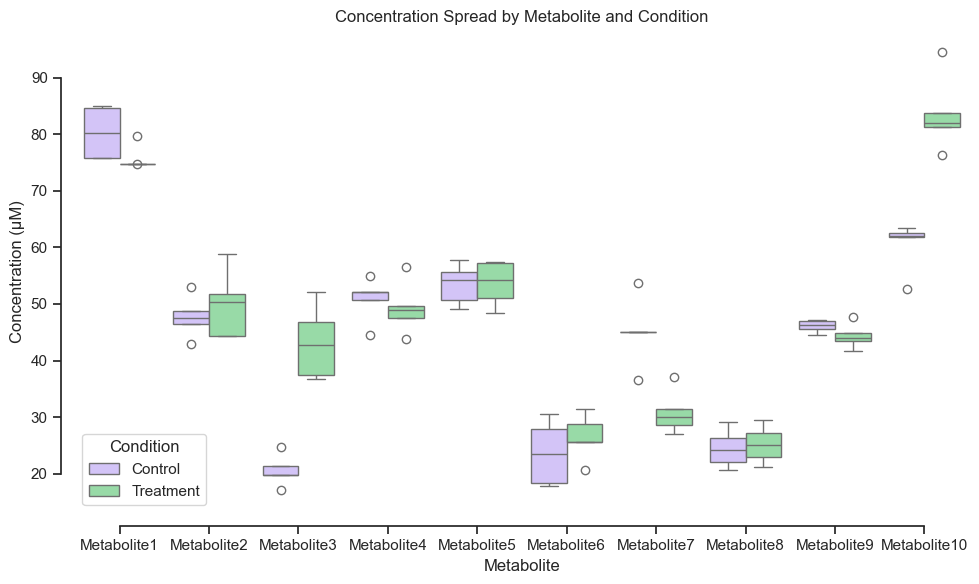

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 6))
sns.boxplot(x="Metabolite", y="Concentration", hue="Condition", palette=["m", "g"], data=df)
plt.title("Concentration Spread by Metabolite and Condition")
plt.xlabel("Metabolite")
plt.ylabel("Concentration (µM)")
plt.xticks(rotation=45)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig("boxplot_metabolites.png")
print("\nBoxplot saved as 'boxplot_metabolites.png'")

Bar plot saved as 'barplot_metabolites.png'


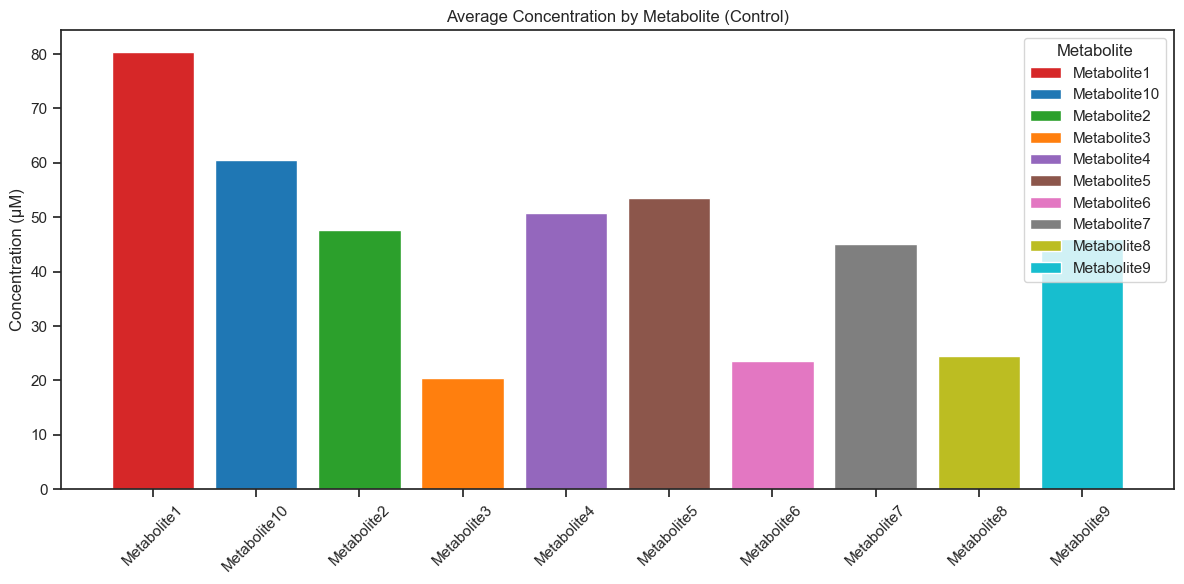

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
metabolites = mean_data[mean_data["Condition"] == "Control"]["Metabolite"]
counts = mean_data[mean_data["Condition"] == "Control"]["Concentration"]
bar_labels = metabolites
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax.bar(metabolites, counts, label=bar_labels, color=bar_colors)
ax.set_ylabel("Concentration (µM)")
ax.set_title("Average Concentration by Metabolite (Control)")
ax.legend(title="Metabolite")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("barplot_metabolites.png")
print("Bar plot saved as 'barplot_metabolites.png'")

Bar plot saved as 'barplot_metabolites.png'


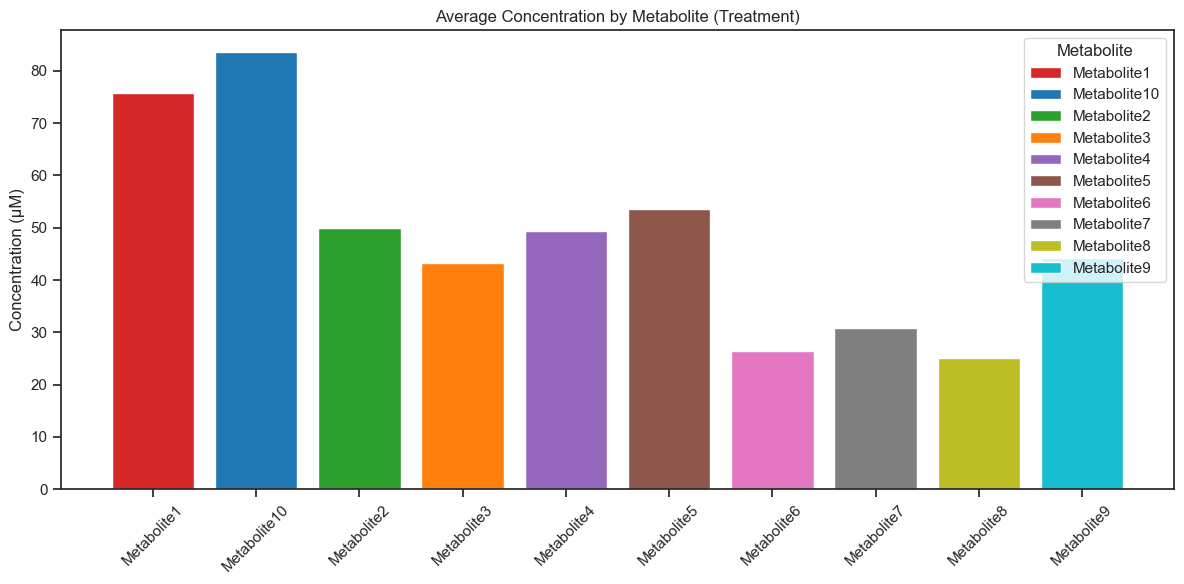

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
metabolites = mean_data[mean_data["Condition"] == "Treatment"]["Metabolite"]
counts = mean_data[mean_data["Condition"] == "Treatment"]["Concentration"]
bar_labels = metabolites
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax.bar(metabolites, counts, label=bar_labels, color=bar_colors)
ax.set_ylabel("Concentration (µM)")
ax.set_title("Average Concentration by Metabolite (Treatment)")
ax.legend(title="Metabolite")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("barplot_metabolites.png")
print("Bar plot saved as 'barplot_metabolites.png'")

In [25]:
import plotly.graph_objects as go
fig = go.Figure()
chosen_metabolite = "Metabolite1"
line_data = df[df["Metabolite"] == chosen_metabolite]
control_data = line_data[line_data["Condition"] == "Control"]
treatment_data = line_data[line_data["Condition"] == "Treatment"]
fig.add_trace(go.Scatter(x=control_data["Replicate"], y=control_data["Concentration"], mode="lines+markers", name="Control", line=dict(color="blue")))
fig.add_trace(go.Scatter(x=treatment_data["Replicate"], y=treatment_data["Concentration"], mode="lines+markers", name="Treatment", line=dict(color="orange")))
fig.update_layout(
    title=f"Concentration Trends for {chosen_metabolite}",
    xaxis_title="Replicate",
    yaxis_title="Concentration (µM)",
    xaxis=dict(tickmode="linear", tickvals=[1, 2, 3, 4, 5]),
    legend_title="Condition",
    hovermode="closest"
)
fig.write_html("lineplot_metabolite.html")
print(f"Interactive line plot for {chosen_metabolite} saved as 'lineplot_metabolite.html'")

Interactive line plot for Metabolite1 saved as 'lineplot_metabolite.html'
